In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
from PIL import Image
import time

RGB
(800, 542)


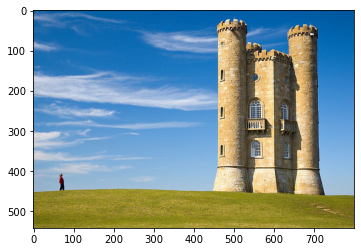

In [2]:
# Opening Image

img = Image.open('image.jpg')
print(img.mode)
print(img.size)
imshow(np.asarray(img))

In [3]:
original = np.array(img)
img_array = np.array(img)
#img_array = np.transpose(img_array, (1, 0, 2))
print(img_array.shape)

(542, 800, 3)


In [4]:
# Milestone 1

def calculate_energy(img_array):
    energy = img_array.copy()
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            neighbors = {}
            # Edge Cases
            if i == 0:
                neighbors['up'] = img_array[i][j]
            if j == 0:
                neighbors['left'] = img_array[i][j]
            if i == img_array.shape[0] - 1:
                neighbors['down'] = img_array[i][j]
            if j == img_array.shape[1] - 1:
                neighbors['right'] = img_array[i][j]
            # General Case
            if 'up' not in neighbors:
                neighbors['up'] = img_array[i-1][j]
            if 'down' not in neighbors:
                neighbors['down'] = img_array[i+1][j]
            if 'left' not in neighbors:
                neighbors['left'] = img_array[i][j-1]
            if 'right' not in neighbors:
                neighbors['right'] = img_array[i][j+1]
            dx_r = int(neighbors['left'][0]) - int(neighbors['right'][0])
            dx_g = int(neighbors['left'][1]) - int(neighbors['right'][1])
            dx_b = int(neighbors['left'][2]) - int(neighbors['right'][2])
            dx = (dx_r ** 2) + (dx_g ** 2) + (dx_b ** 2)
            dy_r = int(neighbors['up'][0]) - int(neighbors['down'][0])
            dy_g = int(neighbors['up'][1]) - int(neighbors['down'][1])
            dy_b = int(neighbors['up'][2]) - int(neighbors['down'][2])
            dy = (dy_r ** 2) + (dy_g ** 2) + (dy_b ** 2)
            e = np.sqrt(dx) + np.sqrt(dy)
            energy[i][j] = int(e)
    return energy

In [5]:
# Milestone 2

def compute_seam(img_array):
    energy = calculate_energy(img_array)
    
    dp = np.zeros((energy.shape[0], energy.shape[1]))
    for j in range(dp.shape[1]):
        dp[0][j] = energy[0][j][0]
    for i in range(1, dp.shape[0]):
        for j in range(dp.shape[1]):
            if j == 0:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j][0], energy[i-1][j+1][0])
            elif j == dp.shape[1] - 1:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0])
            else:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0], energy[i-1][j+1][0])
    
    seam = []
    minimum = min(dp[-1])
    #print("minimum in last row: " + str(minimum))
    index = np.where(dp[-1] == minimum)
    print("index: " + "j = " + str(index[0][0]))
    i = len(dp)-1
    j = index[0][0]
    seam.append([i, j])

    for row in range(len(dp) - 1, 0, -1):
        if j == 0:
            up = dp[row-1][j]
            up_right = dp[row-1][j+1]
            if up_right < up:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        elif j == len(dp[row]) - 1:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            if up_left < up:
                i = row-1
                j = j-1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        else:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            up_right = dp[row-1][j+1]
            if up_left <= up and up_left <= up_right:
                i = row-1
                j = j-1
                seam.append([i, j])
            elif up_right <= up and up_right <= up_left:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
    return seam

In [6]:
# Milestone 3

def greedy_seam(img_array):
    energy = calculate_energy(img_array)
    
    dp = np.zeros((energy.shape[0], energy.shape[1]))
    for i in range(dp.shape[0]):
        for j in range(dp.shape[1]):
            dp[i][j] = int(energy[i][j][0])
            dp[i][j] = int(energy[i][j][0])
            dp[i][j] = int(energy[i][j][0])
    
    seam = []
    minimum = min(dp[-1])
    #print("minimum in last row: " + str(minimum))
    index = np.where(dp[-1] == minimum)
    print("index: " + "j = " + str(index[0][0]))
    i = len(dp)-1
    j = index[0][0]
    seam.append([i, j])

    for row in range(len(dp) - 1, 0, -1):
        if j == 0:
            up = dp[row-1][j]
            up_right = dp[row-1][j+1]
            if up_right < up:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        elif j == len(dp[row]) - 1:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            if up_left < up:
                i = row-1
                j = j-1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        else:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            up_right = dp[row-1][j+1]
            if up_left <= up and up_left <= up_right:
                i = row-1
                j = j-1
                seam.append([i, j])
            elif up_right <= up and up_right <= up_left:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
    return seam

In [7]:
def improved_energy(img_array):
    energy = img_array.copy()
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            neighbors = {}
            # Edge Cases
            if i == 0 or i == 1:
                neighbors['up'] = img_array[i][j]
            if j == 0 or j == 1:
                neighbors['left'] = img_array[i][j]
            if i == img_array.shape[0] - 1 or i == img_array.shape[0] - 2:
                neighbors['down'] = img_array[i][j]
            if j == img_array.shape[1] - 1 or j == img_array.shape[1] - 2:
                neighbors['right'] = img_array[i][j]
            # General Case
            if 'up' not in neighbors:
                neighbors['up'] = img_array[i-2][j]
            if 'down' not in neighbors:
                neighbors['down'] = img_array[i+2][j]
            if 'left' not in neighbors:
                neighbors['left'] = img_array[i][j-2]
            if 'right' not in neighbors:
                neighbors['right'] = img_array[i][j+2]
            dx_r = int(neighbors['left'][0]) - int(neighbors['right'][0])
            dx_g = int(neighbors['left'][1]) - int(neighbors['right'][1])
            dx_b = int(neighbors['left'][2]) - int(neighbors['right'][2])
            dx = (dx_r ** 2) + (dx_g ** 2) + (dx_b ** 2)
            dy_r = int(neighbors['up'][0]) - int(neighbors['down'][0])
            dy_g = int(neighbors['up'][1]) - int(neighbors['down'][1])
            dy_b = int(neighbors['up'][2]) - int(neighbors['down'][2])
            dy = (dy_r ** 2) + (dy_g ** 2) + (dy_b ** 2)
            e = np.sqrt(dx) + np.sqrt(dy)
            energy[i][j] = int(e)
    return energy

energy = improved_energy(img_array)

def improved_seam(img_array):
    global energy
    dp = np.zeros((energy.shape[0], energy.shape[1]))
    for j in range(dp.shape[1]):
        dp[0][j] = energy[0][j][0]
    for i in range(1, dp.shape[0]):
        for j in range(dp.shape[1]):
            if j == 0:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j][0], energy[i-1][j+1][0])
            elif j == dp.shape[1] - 1:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0])
            else:
                dp[i][j] = int(energy[i][j][0]) + min(energy[i-1][j-1][0], energy[i-1][j][0], energy[i-1][j+1][0])
    
    seam = []
    minimum = min(dp[-1])
    #print("minimum in last row: " + str(minimum))
    index = np.where(dp[-1] == minimum)
    print("index: " + "j = " + str(index[0][0]))
    i = len(dp)-1
    j = index[0][0]
    seam.append([i, j])

    for row in range(len(dp) - 1, 0, -1):
        if j == 0:
            up = dp[row-1][j]
            up_right = dp[row-1][j+1]
            if up_right < up:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        elif j == len(dp[row]) - 1:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            if up_left < up:
                i = row-1
                j = j-1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
        else:
            up = dp[row-1][j]
            up_left = dp[row-1][j-1]
            up_right = dp[row-1][j+1]
            if up_left <= up and up_left <= up_right:
                i = row-1
                j = j-1
                seam.append([i, j])
            elif up_right <= up and up_right <= up_left:
                i = row-1
                j = j+1
                seam.append([i, j])
            else:
                i = row-1
                j = j
                seam.append([i, j])
    
    energy = remove_energy(energy, seam)
    return seam

def remove_energy(energy, seam):
    energy_list = energy.tolist()
    for coord in seam:
        del energy_list[coord[0]][coord[1]]
    energy_final = np.array(energy_list)
    return energy_final

Number of seams to remove: 50
Horizontal (h) / Vertical (v): v
index: j = 131
index: j = 16
index: j = 363
index: j = 764
index: j = 65
index: j = 731
index: j = 353
index: j = 615
index: j = 243
index: j = 403
index: j = 8
index: j = 484
index: j = 62
index: j = 502
index: j = 606
index: j = 19
index: j = 25
index: j = 354
index: j = 438
index: j = 632
index: j = 660
index: j = 178
index: j = 716
index: j = 762
index: j = 2
index: j = 91
index: j = 167
index: j = 173
index: j = 310
index: j = 712
index: j = 68
index: j = 161
index: j = 61
index: j = 61
index: j = 66
index: j = 316
index: j = 491
index: j = 687
index: j = 742
index: j = 266
index: j = 340
index: j = 398
index: j = 593
index: j = 28
index: j = 181
index: j = 406
index: j = 498
index: j = 559
index: j = 680
index: j = 17
Execution Time: 105.40479373931885
(542, 750, 3)


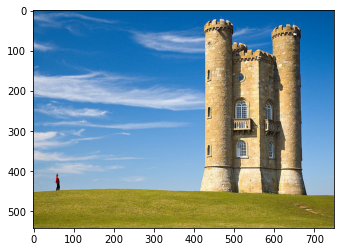

In [8]:
# Milestone 3.1

def remove_seam(img_array, seam):
    img_list = img_array.tolist()
    
    for coord in seam:
            del img_list[coord[0]][coord[1]]
    
    img_final = np.array(img_list)
    return img_final

num_seams = int(input("Number of seams to remove: "))
direction = input("Horizontal (h) / Vertical (v): ")

if direction == 'h':
    img_array = np.transpose(img_array, (1, 0, 2))

time1 = time.time()
    
for i in range(num_seams):
    #seam = compute_seam(img_array)
    #seam = greedy_seam(img_array)
    seam = improved_seam(img_array)
    img_array = remove_seam(img_array, seam)

time2 = time.time()
print("Execution Time: " + str(time2-time1))

print(img_array.shape)
final_img = Image.fromarray(img_array.astype(np.uint8))
imshow(np.asarray(final_img))
final_img.show()

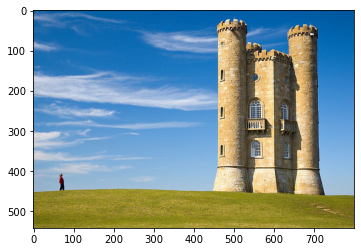

In [9]:
final_img.save("var.png","PNG")
orig_img = Image.fromarray(original.astype(np.uint8))
imshow(np.asarray(orig_img))
orig_img.show()